# 1.Import Library

In [1]:
import xarray as xr
import os
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use(style='seaborn-v0_8-paper')

# 2.Read only train data

In [2]:
# Directory containing the files
directory = 'data/train'

# Use glob to find files matching the pattern 'surface_*'
file_pattern = os.path.join(directory, 'surface_*')
filenames = glob.glob(file_pattern)

# Open and concatenate datasets
datasets = []
for file in tqdm(filenames):
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Concatenate all datasets along a time dimension because there is 1 level
surface_ds = xr.concat(datasets, dim='time').to_dataframe().droplevel(level=[1, 2])  # dimension name 'time' and drop 'lat', 'long'

100%|██████████| 264/264 [00:01<00:00, 216.01it/s]


In [3]:
# Display the first few rows
display(surface_ds.head())

# Display the data types of each column
print(surface_ds.dtypes)

# Display basic statistics
display(surface_ds.describe())

# Check for missing values
print(surface_ds.isnull().sum())

,u10,v10,t2m,msl
time,,,,
2000-01-01,-0.038587,-1.201395,297.115253,100977.746921
2000-01-02,-0.501069,-1.184308,296.896958,101006.754227
2000-01-03,-0.683377,-1.051317,296.570566,100958.503597
2000-01-04,-0.819343,-0.589373,297.595229,100936.250000
2000-01-05,-0.659145,-0.428720,297.464861,101029.439096


u10    float64
v10    float64
t2m    float64
msl    float64
dtype: object


,u10,v10,t2m,msl
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.090567,0.131579,298.938156,101039.908330
std,1.441688,1.308649,1.597265,216.399845
min,-6.431226,-5.134912,292.011719,100200.125000
25%,-0.930487,-0.830759,298.117877,100893.688946
50%,0.030933,0.300720,299.070434,101030.749997
75%,1.062688,1.163443,299.960760,101179.766280
max,5.044467,4.260921,303.491699,101954.000000


u10    0
v10    0
t2m    0
msl    0
dtype: int64


In [4]:
# Use glob to find files matching the pattern 'upper_air_*'
file_pattern = os.path.join(directory, 'upper_air_*')
filenames = glob.glob(file_pattern)

# Open and concatenate datasets
datasets = []
for file in tqdm(filenames):
    ds = xr.open_dataset(file)
    datasets.append(ds)

# Concatenate all datasets along a time dimension because there are 13 levels
upper_air_ds = xr.concat(datasets, dim='time').to_dataframe().droplevel(level=[2, 3])  # dimension name 'time' and drop 'lat', 'long'

100%|██████████| 264/264 [00:01<00:00, 207.63it/s]


#

In [5]:
# Display the first few rows
display(upper_air_ds.head())

# Display the data types of each column
display(upper_air_ds.dtypes)

# Display basic statistics
display(upper_air_ds.describe())

# Check for missing values
print(upper_air_ds.isnull().sum())

z         q           t          u          v
time       level                                                           
2000-01-01 50     200900.081634  0.000003  206.257643   2.265401  -3.107579
           100    161939.297894  0.000001  188.497064 -13.600701   1.539870
           150    139151.203750  0.000009  203.746389  -8.438015  12.598331
           200    121711.148359  0.000071  218.951537  -9.927349   0.064058
           250    107295.627762  0.000112  231.706599  -3.299685   2.778302

z    float64
q    float64
t    float64
u    float64
v    float64
dtype: object

,z,q,t,u,v
count,104468.000000,1.044680e+05,104468.000000,104468.000000,104468.000000
mean,81393.185742,4.467291e-03,251.443539,-4.305195,0.116907
std,60793.722229,5.866247e-03,35.753417,8.554575,4.579290
min,171.089966,5.809896e-07,184.016129,-46.283569,-28.139694
25%,30739.109424,4.186503e-05,219.731889,-8.695604,-2.386655
50%,74389.713531,7.893757e-04,258.071301,-3.739821,0.009122
75%,122232.856187,8.137270e-03,283.548927,0.771485,2.351500
max,203476.562500,2.050894e-02,301.684082,35.316742,31.005325


z    0
q    0
t    0
u    0
v    0
dtype: int64


In [6]:
surface_unit_dict = {"t2m": ["2m temperature", "K"],
                     "u10": ["10m u component of wind", "m/s"],
                     "v10": ["10m v component of wind", "m/s"],
                     "msl": ["mean sea level pressure", "Pa"]}

In [7]:
upper_air_dict = {"z": ["geopotential", "m²/s²"],
                  "t": ["tempurature", "K"],
                  "q": ["specific humidity", "g/kg"],
                  "u": ["u component of wind ", "m/s"],
                  "v": ["v component of wind", "m/s"]}

# 3.Visualize Data

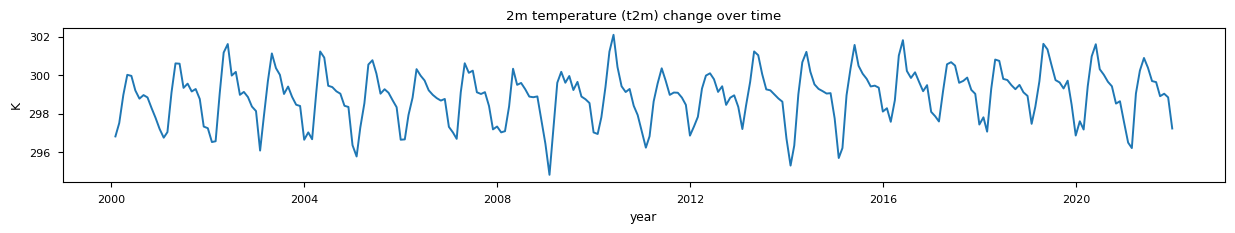

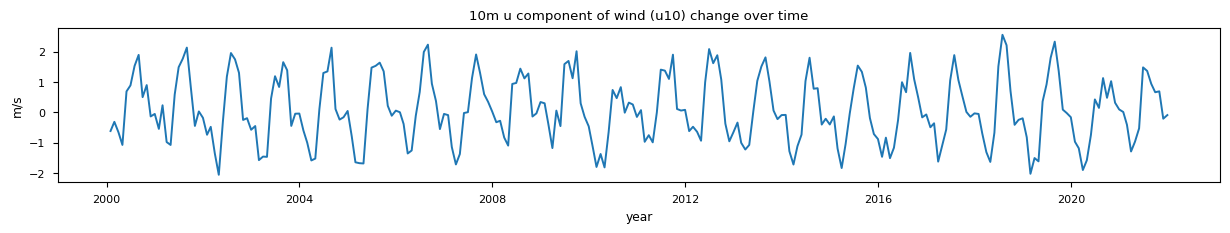

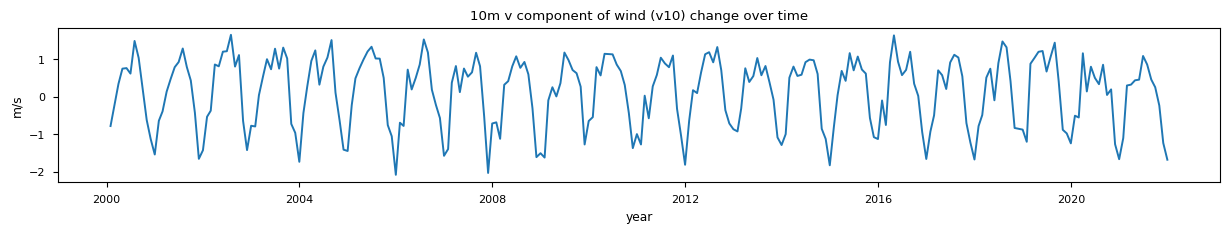

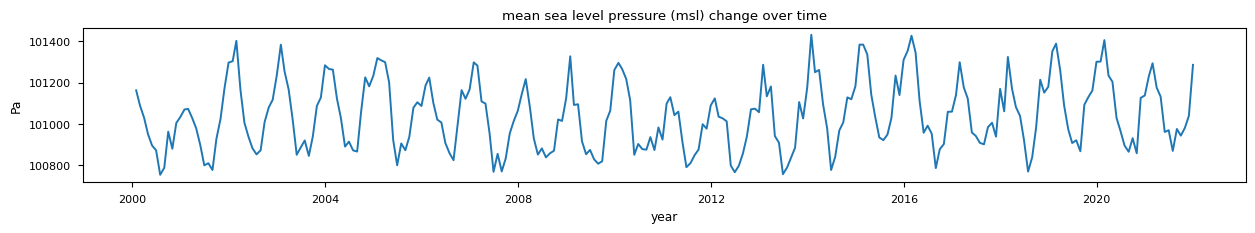

In [8]:
# plot surface variable change over time by calculate average monthly
for col in surface_unit_dict:
    plt.figure(figsize=(15, 2))
    plt.plot(surface_ds[col].resample('M').mean())
    plt.xlabel("year")
    plt.ylabel(surface_unit_dict[col][1])
    plt.title(f"{surface_unit_dict[col][0]} ({col}) change over time")
    # plt.title(" ")
    plt.savefig(f"eda_plot/{col}_surface_change")

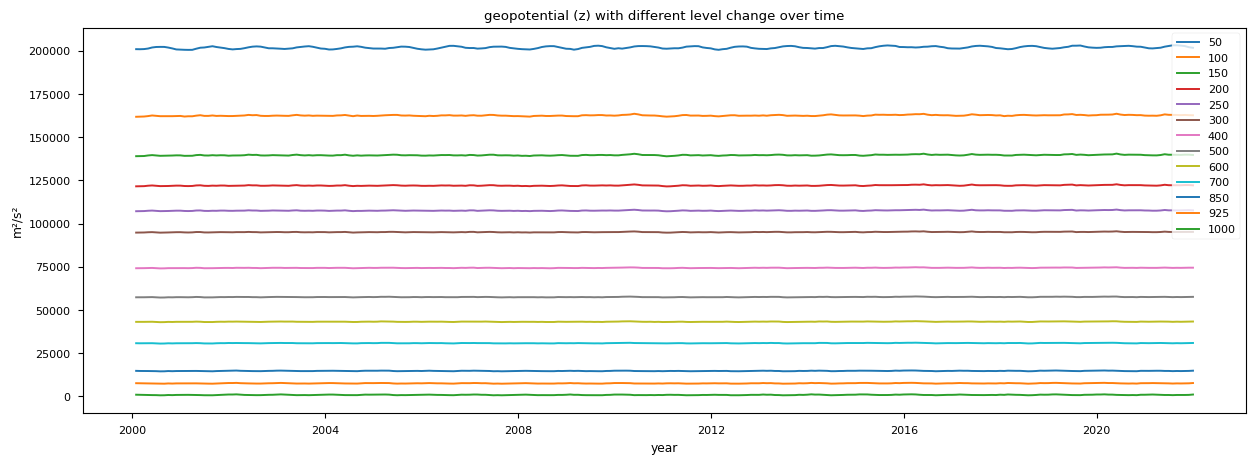

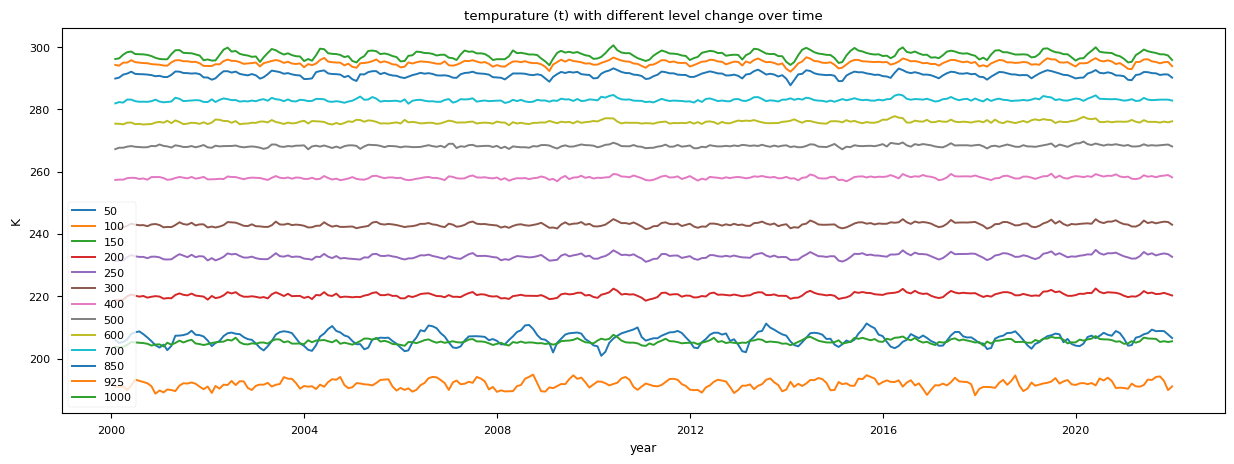

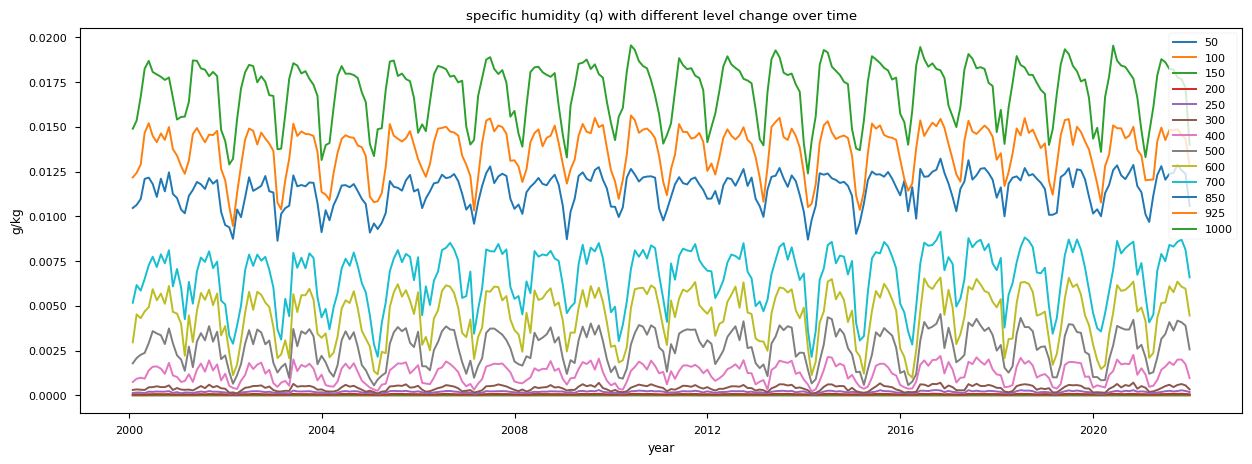

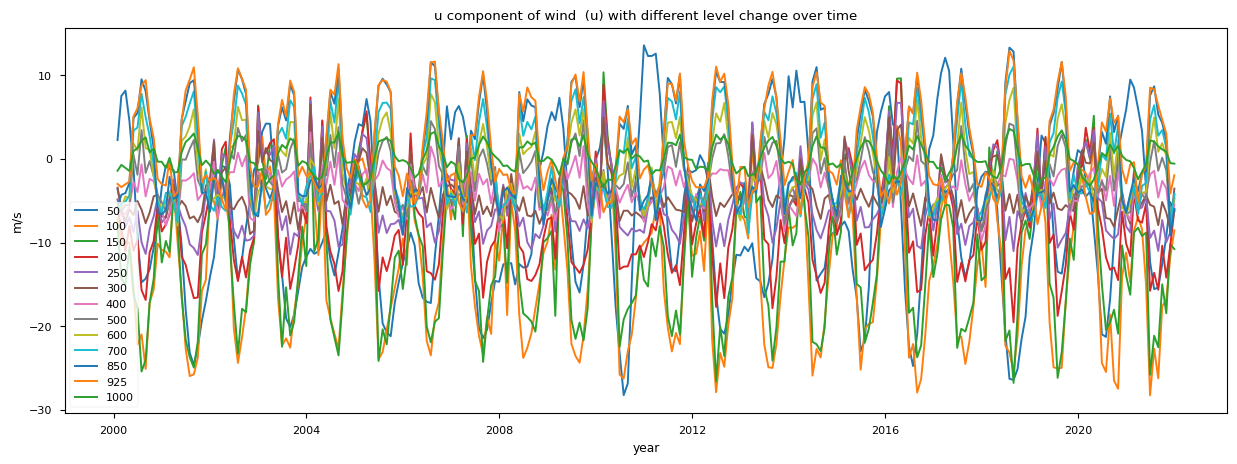

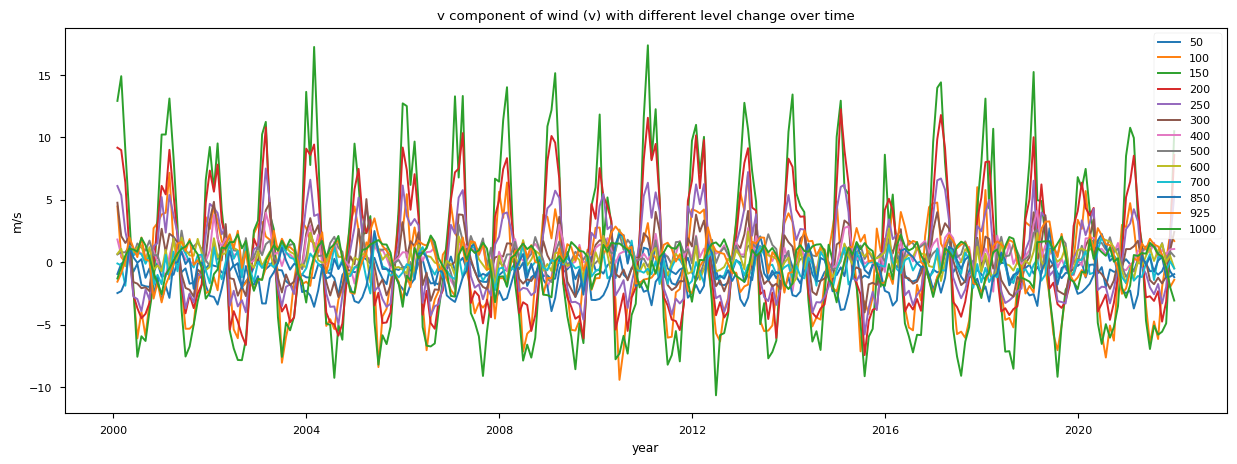

In [9]:
# plot upper air variable change over time by calculate average monthly at different levels
upper_air_ds = upper_air_ds.swaplevel(0, 1)
for col in upper_air_dict:
    plt.figure(figsize=(15, 5))
    for lv in upper_air_ds.index.levels[0]:
        plt.plot(upper_air_ds[upper_air_ds.index.get_loc(lv)][col].droplevel(level=[0]).resample('M').mean(), label=lv)
    
    plt.xlabel("year")
    plt.ylabel(upper_air_dict[col][1])
    plt.title(f'{upper_air_dict[col][0]} ({col}) with different level change over time')
    # plt.title(' ')
    plt.legend()
    plt.savefig(f"eda_plot/{col}_upperair_change")